Auteur : Antoine Chesnais  
Date dernière version : 05/12/2019  
Description : Ce notebook contient la partie modélisation purement supervisée des données de tags de stackoverflow  
Librairies utilisées : Pandas, Numpy, Scipy, Sklearn, re, Matplotlib, Seaborn, wordcloud, json, joblib 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chargement-des-données-:" data-toc-modified-id="Chargement-des-données-:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chargement des données :</a></span></li><li><span><a href="#Analyse-des-tags-:" data-toc-modified-id="Analyse-des-tags-:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse des tags :</a></span><ul class="toc-item"><li><span><a href="#Nombre-de-tags-par-question-:" data-toc-modified-id="Nombre-de-tags-par-question-:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Nombre de tags par question :</a></span></li><li><span><a href="#Visualisation-des-tags-les-plus-fréquents-:" data-toc-modified-id="Visualisation-des-tags-les-plus-fréquents-:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualisation des tags les plus fréquents :</a></span></li><li><span><a href="#Visualisation-des-associations-de-tags-les-plus-fréquentes-:" data-toc-modified-id="Visualisation-des-associations-de-tags-les-plus-fréquentes-:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualisation des associations de tags les plus fréquentes :</a></span></li><li><span><a href="#Recherche-du-nombre-minimal-de-tags-nécessaires-:" data-toc-modified-id="Recherche-du-nombre-minimal-de-tags-nécessaires-:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Recherche du nombre minimal de tags nécessaires :</a></span></li></ul></li><li><span><a href="#Séparation-en-train-et-test-set-:" data-toc-modified-id="Séparation-en-train-et-test-set-:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Séparation en train et test set :</a></span><ul class="toc-item"><li><span><a href="#Réduction-du-nombre-de-tags-cible-(100)-:" data-toc-modified-id="Réduction-du-nombre-de-tags-cible-(100)-:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Réduction du nombre de tags cible (100) :</a></span></li><li><span><a href="#Utilisation-de-train-test-split-:" data-toc-modified-id="Utilisation-de-train-test-split-:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Utilisation de train-test-split :</a></span></li></ul></li><li><span><a href="#Modélisation-:" data-toc-modified-id="Modélisation-:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modélisation :</a></span><ul class="toc-item"><li><span><a href="#Choix-de-la-représentation-des-données-:" data-toc-modified-id="Choix-de-la-représentation-des-données-:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Choix de la représentation des données :</a></span></li><li><span><a href="#Test-de-différents-modèles-:" data-toc-modified-id="Test-de-différents-modèles-:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Test de différents modèles :</a></span></li><li><span><a href="#Comparaison-des-performances-et-choix-du-modèle-:" data-toc-modified-id="Comparaison-des-performances-et-choix-du-modèle-:-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Comparaison des performances et choix du modèle :</a></span></li><li><span><a href="#Sauvegarde-du-modèle" data-toc-modified-id="Sauvegarde-du-modèle-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Sauvegarde du modèle</a></span></li></ul></li><li><span><a href="#Test-du-modèle-retenu-sur-le-set-d'évaluation-:" data-toc-modified-id="Test-du-modèle-retenu-sur-le-set-d'évaluation-:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Test du modèle retenu sur le set d'évaluation :</a></span><ul class="toc-item"><li><span><a href="#Performance-sur-le-test-set-:" data-toc-modified-id="Performance-sur-le-test-set-:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Performance sur le test set :</a></span></li><li><span><a href="#Exemple-d'utilisation-:" data-toc-modified-id="Exemple-d'utilisation-:-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Exemple d'utilisation :</a></span></li></ul></li></ul></div>

In [1]:
import json
from joblib import dump, load

# Librairies de manipulation de données
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

# Librairies extraction de features depuis du texte
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraires d'algorithmes ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

# Librairies de calcul de performances
from sklearn.metrics import f1_score, precision_recall_fscore_support

# Librairies de visualisation
import matplotlib as mplb
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import functions

# Chargement des données :

In [2]:
original_data = pd.read_csv('cleaned_dataset.csv')

In [3]:
original_data.fillna('', inplace=True)

In [4]:
display(original_data.head())

,title,body,tags,code_text,body_text,links,special_string,files_extensions,C++,C#,spacy_lemmetized_text,cleaned_questions
0,How to use AnimatedImageDrawable (GIF image) b...,<p>In API 28 <code>AnimatedImageDrawable</code...,"['android', 'gif', 'android-9.0-pie', 'animate...","['AnimatedImageDrawable', 'AppCompat-v7', 'Sup...",In API 28 was introduced for displaying gif i...,['https://developer.android.com/reference/andr...,,,,,animatedimagedrawable gif image api api gif im...,animatedimagedrawable gif image api api gif im...
1,how android jetpack SavedStateViewModelFactory...,<p>my viewmodel-savestate version is<br>\n<cod...,"['android', 'android-jetpack']","[""implementation 'androidx.lifecycle:lifecycle...",my viewmodel-savestate version is\n\nin versio...,[],1.0.0 1.0.0,,,,android jetpack savedstateviewmodelfactory vie...,android jetpack savedstateviewmodelfactory vie...
2,Can&#39;t connect to a SQL Server from Weblogic,<p>I got the job to make run a project that us...,"['java', 'sql-server', 'weblogic']","['SQL Error: 18456, SQLState: S0001', '...inte...",I got the job to make run a project that usual...,[],12.1.3.0 .war weblogic.xml application.propert...,.war .xml .properties .url,,,sql server weblogic job make run project opens...,sql server weblogic make openshift weblogic mv...
3,Core Data &amp; Xcode 11: Please switch to usi...,<p>Just moved to Xcode 11 and getting the foll...,"['swift', 'xcode', 'core-data', 'core-data-mig...",['CoreData: fault: One or more models in this ...,Just moved to Xcode 11 and getting the followi...,['https://i.stack.imgur.com/ozBsQ.png'],,,,,core data amp xcode please quot nssecureunarch...,core data amp xcode nssecureunarchivefromdata ...
4,Why powershell does not run Angular commands?,<p>I have started to learn Angular but I note ...,"['javascript', 'angular', 'powershell', 'angul...","['ng new new-app\n', 'ng serve\n', 'ng : File ...",I have started to learn Angular but I note tha...,[],p.s,.s,,,powershell command note powershell windows err...,powershell command note powershell windows com...


Pour des raisons de temps de calcul, on sélectionne uniquement le quart du dataset.

In [5]:
data = original_data.loc[:round(len(original_data)/4),:]

On créer ensuite un ensemble de questions, qui sont composées du texte (titre + corps) de la question, avec les extensions de fichiers mentionnés et les occurences de 'C++' et 'C#'.

In [6]:
questions = data['cleaned_questions'] + ' ' + data['files_extensions'] + ' ' + data['C++'] + ' ' + data['C#']

In [7]:
questions = questions.apply(lambda x: re.sub("\s+", ' ', x))

In [8]:
display(questions[2])

"sql server weblogic make openshift weblogic mvn build connection datum openshift 's environment weblogic app security weblogic log anybody app connection datum weblogic 's datasource know credential .war .xml .properties .url "

In [9]:
display(questions[186])

"ews graph key convert ews api graph api return calendar event ews key graph key graph calendar event purpose format ca n't powershell library 'd api c#"

# Analyse des tags :

## Nombre de tags par question :

In [10]:
tags_per_question = data.tags.apply(lambda x: len(re.findall("'(.*?)'", x)))

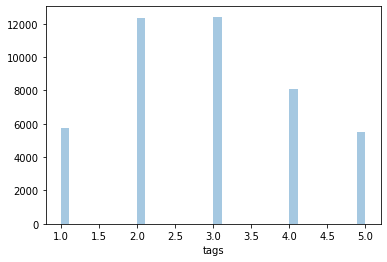

In [11]:
sns.distplot(tags_per_question, kde=False)

On voit que les questions possèdent en grande majorité plus de 2 tags, néanmoins certaines en ont un seul.

## Visualisation des tags les plus fréquents :

In [12]:
tags_vectorizer = CountVectorizer(tokenizer= lambda x: re.findall("'([^']*)'", x), binary=True)

,tags,count,rank
8089,python,5793,0
5270,javascript,5063,1
5221,java,2900,2
1600,c#,2577,3
4716,html,1964,4
...,...,...,...
2556,date,166,95
9301,shell,159,96
3013,dplyr,157,97
4071,ggplot2,157,98


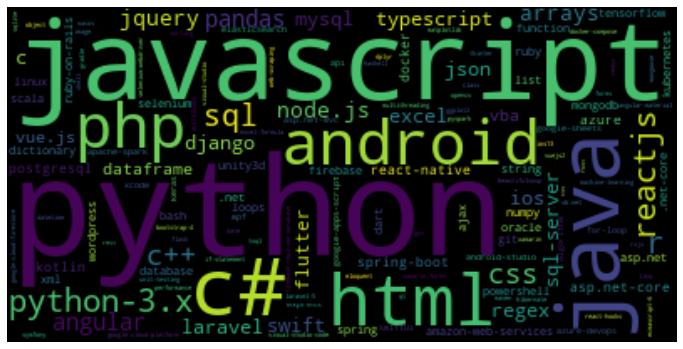

In [13]:
tags, sparse_tags = functions.tags_freq(data.tags, tags_vectorizer)

In [14]:
print(tags.shape)

(11650, 3)


Sans surprises on retrouve dans les tags les plus fréquents des tags généraux comme les languages (python, C#, java, php html ...) et les outils (modules, frameworks ...) liés à ces languages (pandas, mysql, excel, django ...). Pour notre dataset il existe 11650 tags différents.

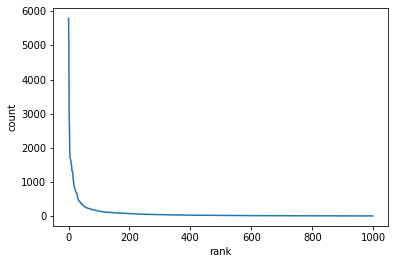

In [15]:
tags['count'] = pd.to_numeric(tags['count'])
sns.lineplot(x='rank', y='count', data=tags[:1000])

A noter que une minorité des tags est fortement représentée, on passe d'un compte de plus de 5000 à une centaine en passant du tag le plus représenté jusqu'au centième.

## Visualisation des associations de tags les plus fréquentes :

In [16]:
bi_tags_vectorizer = CountVectorizer(tokenizer= lambda x: re.findall("'([^']*)'", x), ngram_range=(2,2),
                                     binary=True)

,tags,count,rank
14723,html css,858,0
26075,python pandas,848,1
26132,python python-3.x,820,2
17122,javascript html,628,3
17269,javascript reactjs,593,4
...,...,...,...
16702,java swing,63,95
26605,python-3.x list,63,96
26248,python string,61,97
5776,c# json,60,98


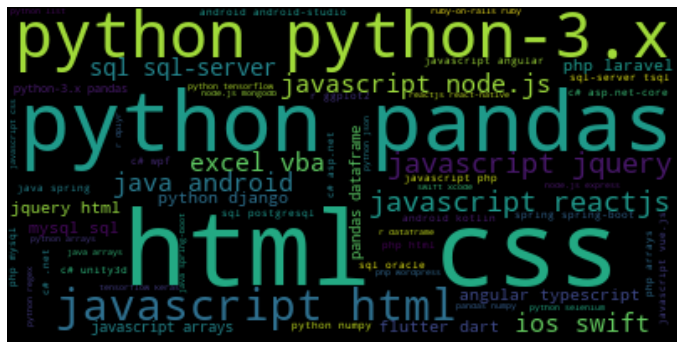

In [17]:
bi_tags, sparse_bi_tags = functions.tags_freq(data.tags, bi_tags_vectorizer)

In [18]:
#functions.tags_questions_coverage(sparse_bi_tags, bi_tags, 5000)

(37436, 3)


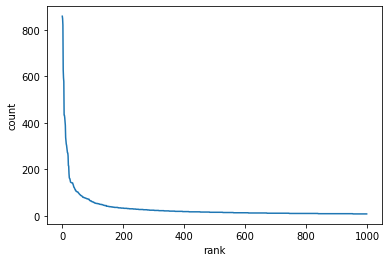

In [19]:
print(bi_tags.shape)
bi_tags['count'] = pd.to_numeric(bi_tags['count'])
sns.lineplot(x='rank', y='count', data=bi_tags[:1000])

In [20]:
tri_tags_vectorizer = CountVectorizer(tokenizer= lambda x: re.findall("'([^']*)'", x), ngram_range=(3,3),
                                     binary=True)

,tags,count,rank
15906,javascript jquery html,211,0
15720,javascript html css,201,1
24244,python pandas dataframe,182,2
24588,python python-3.x pandas,122,3
17063,jquery html css,102,4
...,...,...,...
23909,python list dictionary,17,95
24187,python opencv image-processing,17,96
28934,spring spring-boot spring-security,17,97
23604,python excel pandas,17,98


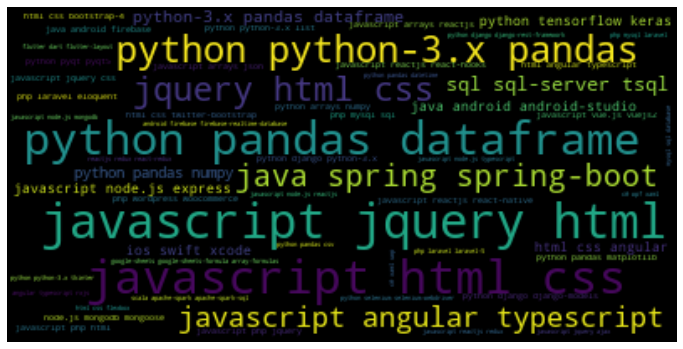

In [21]:
tri_tags, sparse_tri_tags = functions.tags_freq(data.tags, tri_tags_vectorizer)

(33823, 3)


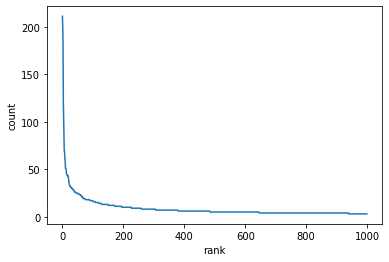

In [22]:
print(tri_tags.shape)
tri_tags['count'] = pd.to_numeric(tri_tags['count'])
sns.lineplot(x='rank', y='count', data=tri_tags[:1000])

## Recherche du nombre minimal de tags nécessaires :

Précédemment on a pu voir que le nombre de tags unique était de 11 650. Cela est très important et nécessiterait un temps de calcul important. Afin de restreindre la cible, on cherche le nombre de tags minimal qui couvre une grande majorité des questions. Pour cela on sélectionne les X tags les plus populaires et l'on regarde le nombre de questions qui possèdent toujours un tags après cette sélection.

### Tags simples :

In [23]:
functions.tags_questions_coverage(sparse_tags, tags, 100, 1)

86.33 questions have at least 1 tag(s)


(86.33279629671651, array([ True,  True,  True, ...,  True,  True,  True]))

0.00 questions have at least 1 tag(s)
79.34 questions have at least 1 tag(s)
86.33 questions have at least 1 tag(s)
88.73 questions have at least 1 tag(s)
90.68 questions have at least 1 tag(s)
91.39 questions have at least 1 tag(s)
92.10 questions have at least 1 tag(s)
92.87 questions have at least 1 tag(s)
93.35 questions have at least 1 tag(s)
93.77 questions have at least 1 tag(s)
94.08 questions have at least 1 tag(s)
94.37 questions have at least 1 tag(s)
94.66 questions have at least 1 tag(s)
94.99 questions have at least 1 tag(s)
95.25 questions have at least 1 tag(s)
95.55 questions have at least 1 tag(s)
95.71 questions have at least 1 tag(s)
95.93 questions have at least 1 tag(s)
96.04 questions have at least 1 tag(s)
96.16 questions have at least 1 tag(s)


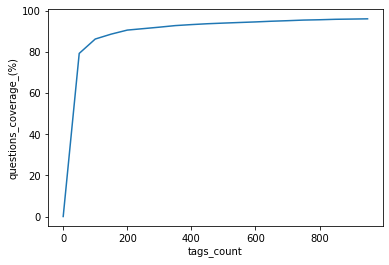

In [24]:
q_cover = pd.DataFrame(columns=['tags_count', 'questions_coverage_(%)'])
for tags_number in range(0,1000,50):
    coverage, matrix = functions.tags_questions_coverage(sparse_tags, tags, tags_number, 1)
    q_cover = q_cover.append({'tags_count': tags_number, 'questions_coverage_(%)': coverage}, ignore_index=True)
sns.lineplot(x='tags_count',y='questions_coverage_(%)' ,data=q_cover)

On constate qu'au final restreindre la cible à 100 tags permet tout de même conserver 86% des questions.

# Séparation en train et test set :

Afin d'évaluer correctement les performances des modèles testés, on sépare le dataset en un set d'entrainement et un set de test.

## Réduction du nombre de tags cible (100) :

Comme vu précédemment, conserver au niveau de la cible unqiuement les 100 tags les plus représentés permet de conserver un nombre suffisant d'échantillons. On filtrera donc la cible pour n'avoir à prédire que ces 100 tags les plus populaires, ainsi que les questions.

In [78]:
tags_cover, questions_tags_filter = functions.tags_questions_coverage(sparse_tags, tags, 100, 1)

86.33 questions have at least 1 tag(s)


On sauvegarde le lien entre le n° d'index des tags et les mots : 

In [26]:
tags_vocab = pd.DataFrame()
tags_vocab['supervised'] = tags['tags'][:100]
tags_vocab.to_csv('models_tags_vocabulary.csv', index=False)

In [27]:
X = questions[questions_tags_filter]
y = sparse_tags[questions_tags_filter,:][:,list(tags[:100].index)]
print(X.shape)
print(y.shape)

(38046,)
(38046, 100)


## Utilisation de train-test-split :

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(30436,)
(7610,)


Au final on a environ 30 000 questions dans le set d'entrainement et 7600 dans le set de test.

On s'assure que le train set et le test set soient équilibrés en termes de distribution des tags à prédire :

Text(0, 0.5, 'tag count')

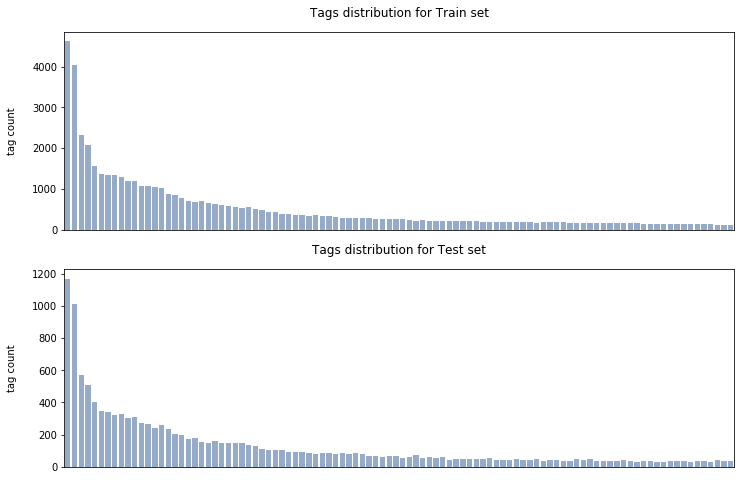

In [29]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
sns.barplot(x=list(range(0,100)), y=y_train.getnnz(0), color='#8CAAD2', ax=ax1)
ax1.set_xticks([])
ax1.set_title(label='Tags distribution for Train set', pad=15)
ax1.set_ylabel('tag count', labelpad=15)
sns.barplot(x=list(range(0,100)), y=y_test.getnnz(0), color='#8CAAD2', ax=ax2)
ax2.set_xticks([])
ax2.set_title(label='Tags distribution for Test set', pad=15)
ax2.set_ylabel('tag count', labelpad=15)

La sélection aléatoire des échantillons a bien permis de conserver des datasets équilibrés.

# Modélisation :

## Choix de la représentation des données :

Dans un premier temps on testera différentes représentations des données afin de choisir la plus intéressante d'un point de vue performances. A noter que pour des raisons de temps de calcul, le test sera effectué sur un seul classifieur. Idéalement, il aurait fallut tester toutes les combinaisons possibles.  
Afin d'éviter le surapprentissage et le data-leakage, l'impact de ces paramètres sera évalué via une cross validation à 4 folds et l'on utilisera l'outils Pipeline de sklearn pour l'enchainement de la création de la représentation et la modélisation.  
On quantifiera la performance à l'aide du F1 score, car celui ci prend en compte à la fois la précision et le Recall. On choisira sa variante 'macro' pour le calcul sur tous les labels, accordant le même poids à chaque Tag à prédire. Une sélection a déjà été effectuée pour choisir les 100 tags les plus importants, ainsi toutes les cibles à prédire le sont également.

### Impact de min_df

min_df contrôle le nombre de questions minimal dans lequel les features de la représentation Bag Of Words doivent apparaitrent pour être retenue. On regarde ci dessous l'impact de ce paramètre sur le classifieur Ridge.

In [30]:
tf_vectorizer = CountVectorizer(max_df=0.15, token_pattern='\S+')
param_grid_vectorizer = {'tf_vectorizer__min_df': (10, 20, 50)}
Ridge = OneVsRestClassifier(RidgeClassifier(solver='sag'))
Ridge_pipe = Pipeline([('tf_vectorizer', tf_vectorizer), ('Ridge', Ridge)])
Ridge_CV = GridSearchCV(Ridge_pipe, param_grid_vectorizer, cv=4, return_train_score=True, 
                        scoring='f1_macro',n_jobs=-1)
Ridge_cv_model_min_df = Ridge_CV.fit(X_train, y_train)

In [31]:
impact_min_df = pd.DataFrame(Ridge_cv_model_min_df.cv_results_)
display(impact_min_df)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tf_vectorizer__min_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,253.764087,25.691092,0.167052,0.015871,10,{'tf_vectorizer__min_df': 10},0.346832,0.335116,0.345553,0.380148,0.351912,0.016923,1,0.387387,0.393658,0.392097,0.461952,0.408773,0.030789
1,212.751655,48.749831,0.154337,0.001295,20,{'tf_vectorizer__min_df': 20},0.340517,0.327968,0.340700,0.364555,0.343435,0.013241,2,0.370273,0.376873,0.374577,0.415364,0.384272,0.018107
2,133.156822,39.688993,0.151601,0.022727,50,{'tf_vectorizer__min_df': 50},0.319863,0.316483,0.320461,0.327019,0.320957,0.003815,3,0.338097,0.344043,0.339134,0.361302,0.345644,0.009315


Text(0.5, 0, 'min_df_value')

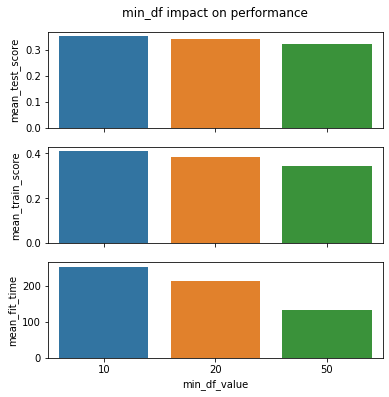

In [32]:
impact_min_df_vis = impact_min_df.loc[:,['param_tf_vectorizer__min_df','mean_fit_time','mean_test_score','mean_train_score']]
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(6,6), sharex=True)
sns.barplot(x='param_tf_vectorizer__min_df', y='mean_test_score' ,data=impact_min_df_vis, ax=ax1)
ax1.set_xlabel('')
ax1.set_title('min_df impact on performance', pad=15)
sns.barplot(x='param_tf_vectorizer__min_df', y='mean_train_score' ,data=impact_min_df_vis, ax=ax2)
ax2.set_xlabel('')
sns.barplot(x='param_tf_vectorizer__min_df', y='mean_fit_time' ,data=impact_min_df_vis, ax=ax3)
ax3.set_xlabel('min_df_value')

On voit que l'augmentation de min_df (moins de features) permet de gagner du temps de calcul et ce sans trop perdre en performances . Un min_df à 20, c.a.d qu'il faut qu'un mot soit au moins présent dans 20 questions pour être retenu donne un bon compromis entre perte de perfromances et temps de calcul.

### Impact de 'Binary' :

Lors la représentation des questions en Bag of Words, plusieurs options sont possibles. On peut par exemple compter le nombre de fois que le mot apparait ou bien seulement sa présence. Ce sont ces deux options qui seront étudiées ci dessous :

In [33]:
tf_vectorizer = CountVectorizer(max_df=0.15, token_pattern='\S+', min_df=20)
param_grid_vectorizer = {'tf_vectorizer__binary': (False, True)}
Ridge = OneVsRestClassifier(RidgeClassifier(solver='sag'))
Ridge_pipe = Pipeline([('tf_vectorizer', tf_vectorizer), ('Ridge', Ridge)])
Ridge_CV = GridSearchCV(Ridge_pipe, param_grid_vectorizer, cv=4, return_train_score=True, 
                        scoring='f1_macro', n_jobs=-1)
Ridge_cv_model_binary = Ridge_CV.fit(X_train, y_train)

In [34]:
impact_binary = pd.DataFrame(Ridge_cv_model_binary.cv_results_)
display(impact_binary)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tf_vectorizer__binary,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,210.103383,47.292885,0.142361,0.010663,False,{'tf_vectorizer__binary': False},0.340546,0.327968,0.340708,0.364710,0.343483,0.013300,2,0.370204,0.376719,0.374634,0.41564,0.384299,0.018247
1,17.798640,1.308958,0.156107,0.003452,True,{'tf_vectorizer__binary': True},0.453524,0.453028,0.457820,0.467968,0.458085,0.006003,1,0.494567,0.494334,0.494657,0.49441,0.494492,0.000127


Text(0.5, 0, 'binary_value')

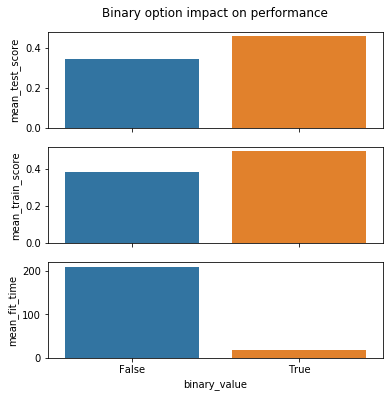

In [35]:
impact_binary_vis = impact_binary.loc[:,['param_tf_vectorizer__binary','mean_fit_time','mean_test_score','mean_train_score']]
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(6,6), sharex=True)
sns.barplot(x='param_tf_vectorizer__binary', y='mean_test_score' ,data=impact_binary_vis, ax=ax1)
ax1.set_xlabel('')
ax1.set_title('Binary option impact on performance', pad=15)
sns.barplot(x='param_tf_vectorizer__binary', y='mean_train_score' ,data=impact_binary_vis, ax=ax2)
ax2.set_xlabel('')
sns.barplot(x='param_tf_vectorizer__binary', y='mean_fit_time' ,data=impact_binary_vis, ax=ax3)
ax3.set_xlabel('binary_value')

La différence est notable, non seulement les performances sont meilleures avec l'option binary = True ( 0.46 vs 0.34), mais le calcul est également 10 fois plus rapide ! Cela est compréhensible, pour notre système de tag la fréquence d'apparition d'un mot n'est pas forcément importante, sa présence ou non par contre elle l'est.

### Impact Tf-Idf :

Une autre représentation Bag Of Words est possible, le Tf-Idf (Term frequency - Inverse Document Frequency). Cette représentation prend en compte la fréquence d'apparition d'un mot dans la question et sa présence dans d'autres questions. Ainsi plus un mot est fréquent dans une question, plus il est important, mais si néanmoins il apparait dans de nombreuses autres questions, son importance sera alors fortement réduite.

In [36]:
vectorizer = TfidfVectorizer(max_df=0.15, token_pattern='\S+')
param_grid_vectorizer = {'tf_idf_vectorizer__min_df': (10, 20, 50)}
Ridge = OneVsRestClassifier(RidgeClassifier(solver='sag'))
Ridge_pipe = Pipeline([('tf_idf_vectorizer', vectorizer), ('Ridge', Ridge)])
Ridge_CV = GridSearchCV(Ridge_pipe, param_grid_vectorizer, cv=4, return_train_score=True, 
                        scoring='f1_macro', n_jobs=-1)
Ridge_cv_model_tf_idf = Ridge_CV.fit(X_train, y_train)

In [37]:
impact_tf_idf = pd.DataFrame(Ridge_cv_model_tf_idf.cv_results_)
display(impact_tf_idf)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tf_idf_vectorizer__min_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,17.676465,0.067786,0.153340,0.003887,10,{'tf_idf_vectorizer__min_df': 10},0.421932,0.419993,0.422010,0.426233,0.422542,0.002279,1,0.470953,0.473820,0.470256,0.475501,0.472632,0.002128
1,16.566935,0.050325,0.146607,0.003665,20,{'tf_idf_vectorizer__min_df': 20},0.415368,0.408249,0.410794,0.417416,0.412957,0.003624,2,0.443132,0.449768,0.444980,0.449340,0.446805,0.002830
2,15.452416,0.061222,0.147355,0.002939,50,{'tf_idf_vectorizer__min_df': 50},0.389512,0.391621,0.392365,0.391431,0.391233,0.001053,3,0.407536,0.412386,0.407305,0.412307,0.409884,0.002464


Text(0.5, 0, 'min_df_value')

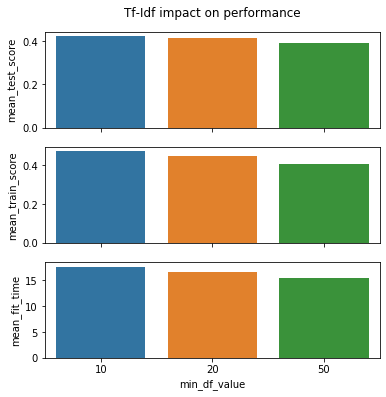

In [38]:
impact_tf_idf_vis = impact_tf_idf.loc[:,['param_tf_idf_vectorizer__min_df','mean_fit_time','mean_test_score','mean_train_score']]
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(6,6), sharex=True)
sns.barplot(x='param_tf_idf_vectorizer__min_df', y='mean_test_score' ,data=impact_tf_idf_vis, ax=ax1)
ax1.set_xlabel('')
ax1.set_title('Tf-Idf impact on performance', pad=15)
sns.barplot(x='param_tf_idf_vectorizer__min_df', y='mean_train_score' ,data=impact_tf_idf_vis, ax=ax2)
ax2.set_xlabel('')
sns.barplot(x='param_tf_idf_vectorizer__min_df', y='mean_fit_time' ,data=impact_tf_idf_vis, ax=ax3)
ax3.set_xlabel('min_df_value')

On retrouve avec cette représentation des features des performances similaires à une représentation binaire, avec juste un score légèrement plus faible.

### Représentation finale :

Aufinal on choisira la réprensatation binaire des features, c'est à dire si un mot est présent ou non car les perfroamnces sont les meilleures dans ce cas, en termes de score et de temps de calcul. La représentation en Tf-Idf n'est pas très loin derrière mais elle présente en plus le désavantage de ne pas forcément être compatible avec les classifieur bayésiens.

## Test de différents modèles :

Dans cette partie on testera différents classifieurs desquels on testera différents hyperparamètres pour chercher à optimiser les performances.  
Les algorithmes et hyperparamètres testés sont :
- Classifieur Ridge : paramètres de régularisation
- Régression Logistique : paramètres de régularisation
- Classifieur linéaire avec apprentissage par descente du gradient : fonction de perte
- Classifieur bayésien naif : paramètre de lissage
- Random Forest : nombre d'estimateurs et profondeur de l'arbre

### Création des pipelines et GridSearch :

In [39]:
vectorizer = CountVectorizer(max_df=0.15, token_pattern='\S+', min_df=20, binary=True)

In [40]:
Ridge = OneVsRestClassifier(RidgeClassifier(solver='sag'))
Logistic = OneVsRestClassifier(LogisticRegression(solver='sag'))
SGDC = OneVsRestClassifier(SGDClassifier())
MultiNB = OneVsRestClassifier(MultinomialNB())
RandomF = RandomForestClassifier(n_estimators=200, max_depth=150, verbose=1)

In [41]:
param_grid_Ridge_tf = {'Ridge__estimator__alpha': (0.1, 1, 10)}
param_grid_Logistic_tf = {'Logistic__estimator__C': (0.1, 0.5, 1)}
param_grid_SGDC_tf = {'SGDC__estimator__loss': ('modified_huber', 'hinge')}
param_grid_MultiNB_tf = {'MultiNB__estimator__alpha': (0.1, 0.4, 0.6,0.8,1)}
param_grid_RandomForest_tf = {'RandomForest__n_estimators':(100, 200, 300), 'RandomForest__max_depth':(10, 30, 50)}

In [42]:
Ridge_pipe = Pipeline([('vectorizer', vectorizer), ('Ridge', Ridge)])
Logistic_pipe = Pipeline([('vectorizer', vectorizer), ('Logistic', Logistic)])
SGDC_pipe = Pipeline([('vectorizer', vectorizer), ('SGDC', SGDC)])
MultiNB_pipe = Pipeline([('vectorizer', vectorizer), ('MultiNB', MultiNB)])
RandomF_pipe = Pipeline([('vectorizer', vectorizer), ('RandomForest', RandomF)])

In [43]:
Ridge_CV = GridSearchCV(Ridge_pipe, param_grid_Ridge_tf, cv=4, return_train_score=True, scoring='f1_macro', n_jobs=-1)
Logistic_CV = GridSearchCV(Logistic_pipe, param_grid_Logistic_tf, cv=4, return_train_score=True, scoring='f1_macro', n_jobs=-1)
SGDC_CV = GridSearchCV(SGDC_pipe, param_grid_SGDC_tf, cv=4, return_train_score=True, scoring='f1_macro', n_jobs=-1)
MultiNB_CV = GridSearchCV(MultiNB_pipe, param_grid_MultiNB_tf, cv=4, return_train_score=True, scoring='f1_macro', n_jobs=-1)
RandomF_CV = GridSearchCV(RandomF_pipe, param_grid_RandomForest_tf, cv=4, return_train_score=True, scoring='f1_macro', n_jobs=-1)

### Fitting et influence des hyperparamètres :

#### Classifieur Ridge

In [44]:
Ridge_cv_model = Ridge_CV.fit(X_train, y_train)

In [45]:
Ridge_cv_results = pd.DataFrame(Ridge_cv_model.cv_results_)
display(Ridge_cv_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Ridge__estimator__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,21.240434,2.005636,0.160820,0.013068,0.1,{'Ridge__estimator__alpha': 0.1},0.454664,0.454595,0.458992,0.468966,0.459304,0.005855,1,0.497098,0.495893,0.496348,0.497313,0.496663,0.000571
1,17.415415,1.305806,0.153589,0.001222,1,{'Ridge__estimator__alpha': 1},0.453597,0.453020,0.457752,0.467995,0.458091,0.006002,2,0.494605,0.494315,0.494715,0.494546,0.494545,0.000146
2,11.680755,0.434183,0.155842,0.027366,10,{'Ridge__estimator__alpha': 10},0.441621,0.443882,0.445290,0.454966,0.446440,0.005094,3,0.474587,0.477841,0.477521,0.475572,0.476380,0.001351


Text(0.5, 1.0, 'mean_train_score')

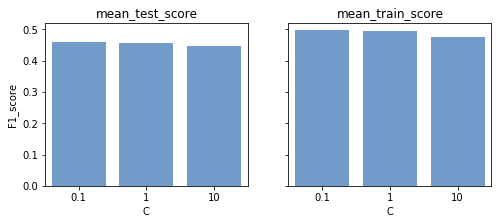

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='param_Ridge__estimator__alpha', y='mean_test_score', data=Ridge_cv_results, ax=ax1, color='#639ad8')
ax1.set_xlabel('C')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
sns.barplot(x='param_Ridge__estimator__alpha', y='mean_train_score', data=Ridge_cv_results, ax=ax2, color='#639ad8')
ax2.set_xlabel('C')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

La régularisation ne semble pas avoir un impact réel sur le F1 score.

#### Régression logistique

In [47]:
Logistic_cv_model = Logistic_CV.fit(X_train, y_train)

E:\Antoine\Logiciels\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [48]:
Logistic_cv_results = pd.DataFrame(Logistic_cv_model.cv_results_)
display(Logistic_cv_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Logistic__estimator__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,73.721551,0.183332,0.146857,0.005525,0.1,{'Logistic__estimator__C': 0.1},0.332064,0.338685,0.335205,0.342020,0.336993,0.003729,3,0.401508,0.399784,0.402457,0.403720,0.401867,0.001436
1,77.882420,0.063697,0.144613,0.001410,0.5,{'Logistic__estimator__C': 0.5},0.473727,0.478752,0.472443,0.482750,0.476918,0.004110,2,0.630637,0.631543,0.632487,0.633322,0.631997,0.001006
2,86.832480,0.202489,0.149599,0.008344,1,{'Logistic__estimator__C': 1},0.500243,0.497191,0.498760,0.503816,0.500002,0.002452,1,0.698657,0.697607,0.703525,0.703784,0.700893,0.002788


Text(0.5, 1.0, 'mean_train_score')

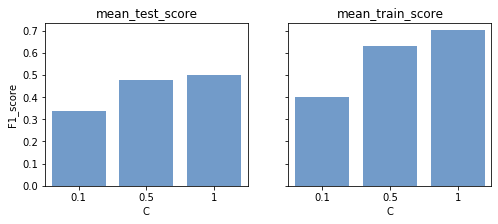

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='param_Logistic__estimator__C', y='mean_test_score', data=Logistic_cv_results, ax=ax1, color='#639ad8')
ax1.set_xlabel('C')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
sns.barplot(x='param_Logistic__estimator__C', y='mean_train_score', data=Logistic_cv_results, ax=ax2, color='#639ad8')
ax2.set_xlabel('C')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

La régularisation fait baisser les performances (plus C est petit plus la régularisation est importante).

#### Modèle linéaire SGDC :

In [50]:
SGDC_cv_model = SGDC_CV.fit(X_train, y_train)

In [51]:
SGDC_cv_results = pd.DataFrame(SGDC_cv_model.cv_results_)
display(SGDC_cv_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SGDC__estimator__loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,7.422469,0.045411,0.157079,0.009288,modified_huber,{'SGDC__estimator__loss': 'modified_huber'},0.456893,0.454399,0.448437,0.459598,0.454832,0.004125,2,0.824780,0.824137,0.826056,0.825666,0.825160,0.000750
1,4.638091,0.063741,0.165805,0.007509,hinge,{'SGDC__estimator__loss': 'hinge'},0.510560,0.517285,0.511454,0.511143,0.512611,0.002718,1,0.764488,0.764898,0.767912,0.764616,0.765478,0.001413


Text(0.5, 1.0, 'mean_train_score')

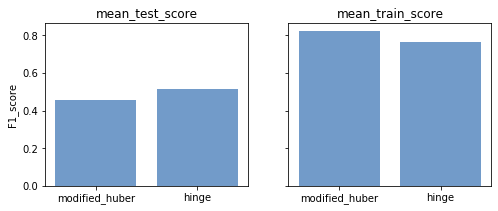

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='param_SGDC__estimator__loss', y='mean_test_score', data=SGDC_cv_results, ax=ax1, color='#639ad8')
ax1.set_xlabel('')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
sns.barplot(x='param_SGDC__estimator__loss', y='mean_train_score', data=SGDC_cv_results, ax=ax2, color='#639ad8')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

La fonction de pertes 'hinge' donne les meileurs résultats. En utilisant la perte 'hinge' on se retrouve avec un modèle 'SVM'.

#### Classifieur bayésien naif

In [53]:
MultiNB_cv_model = MultiNB_CV.fit(X_train, y_train)

In [54]:
MultiNB_cv_results = pd.DataFrame(MultiNB_cv_model.cv_results_)
display(MultiNB_cv_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_MultiNB__estimator__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.929762,0.005248,0.231382,0.003926,0.1,{'MultiNB__estimator__alpha': 0.1},0.435283,0.428752,0.431490,0.435493,0.432754,0.002807,5,0.570100,0.570373,0.568808,0.572932,0.570553,0.001495
1,0.925524,0.024091,0.228638,0.002041,0.4,{'MultiNB__estimator__alpha': 0.4},0.439440,0.436326,0.433672,0.440541,0.437495,0.002694,3,0.539838,0.538618,0.539975,0.542888,0.540330,0.001569
2,1.060164,0.035876,0.246840,0.014479,0.6,{'MultiNB__estimator__alpha': 0.6},0.441318,0.434355,0.435174,0.442604,0.438363,0.003638,2,0.537083,0.538457,0.539265,0.539731,0.538634,0.001005
3,0.928266,0.008932,0.224649,0.003409,0.8,{'MultiNB__estimator__alpha': 0.8},0.442619,0.434322,0.435752,0.441001,0.438424,0.003472,1,0.536428,0.536755,0.538106,0.537300,0.537147,0.000635
4,0.921784,0.012364,0.233376,0.003154,1,{'MultiNB__estimator__alpha': 1},0.440945,0.433942,0.431433,0.436539,0.435715,0.003518,4,0.535239,0.533960,0.536597,0.533802,0.534900,0.001127


Text(0.5, 1.0, 'mean_train_score')

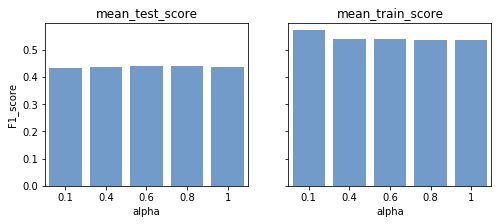

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.barplot(x='param_MultiNB__estimator__alpha', y='mean_test_score', data=MultiNB_cv_results, ax=ax1, color='#639ad8')
ax1.set_xlabel('alpha')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
sns.barplot(x='param_MultiNB__estimator__alpha', y='mean_train_score', data=MultiNB_cv_results, ax=ax2, color='#639ad8')
ax2.set_xlabel('alpha')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

Le paramètre de lissage ne sembla pas avoir un impact réel sur le F1 score.

#### Random Forest

In [56]:
RandomF_cv_model = RandomF_CV.fit(X_train, y_train.toarray())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.2min finished


In [57]:
RandomF_cv_results = pd.DataFrame(RandomF_cv_model.cv_results_)
display(RandomF_cv_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RandomForest__max_depth,param_RandomForest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,31.396266,0.011682,9.148777,0.022216,10,100,"{'RandomForest__max_depth': 10, 'RandomForest_...",0.000017,0.000000,0.000102,0.000311,0.000107,0.000123,7,0.000073,0.000041,0.000202,0.000273,0.000147,0.000094
1,74.527106,0.369039,22.230054,0.117947,10,200,"{'RandomForest__max_depth': 10, 'RandomForest_...",0.000037,0.000052,0.000186,0.000070,0.000086,0.000059,8,0.000067,0.000179,0.000344,0.000103,0.000173,0.000107
2,114.777839,0.246720,36.151773,0.181031,10,300,"{'RandomForest__max_depth': 10, 'RandomForest_...",0.000017,0.000017,0.000017,0.000053,0.000026,0.000015,9,0.000052,0.000132,0.000046,0.000047,0.000069,0.000036
3,60.137000,0.126023,11.961797,0.084619,30,100,"{'RandomForest__max_depth': 30, 'RandomForest_...",0.055396,0.043989,0.039645,0.043743,0.045693,0.005862,5,0.108382,0.100050,0.096700,0.103305,0.102109,0.004309
4,100.039186,0.237518,18.096842,0.033618,30,200,"{'RandomForest__max_depth': 30, 'RandomForest_...",0.048717,0.041747,0.052156,0.044344,0.046741,0.003997,4,0.099830,0.094323,0.109915,0.102947,0.101753,0.005634
5,141.780745,0.337211,30.581697,0.301234,30,300,"{'RandomForest__max_depth': 30, 'RandomForest_...",0.041580,0.039644,0.043003,0.051022,0.043812,0.004330,6,0.094204,0.094571,0.103326,0.107398,0.099875,0.005675
6,63.625556,0.191778,9.745432,0.277532,50,100,"{'RandomForest__max_depth': 50, 'RandomForest_...",0.163777,0.171668,0.166458,0.170943,0.168211,0.003246,2,0.421638,0.421530,0.428418,0.432527,0.426028,0.004676
7,130.819944,0.181605,25.264028,0.497740,50,200,"{'RandomForest__max_depth': 50, 'RandomForest_...",0.159733,0.171687,0.170582,0.170892,0.168223,0.004919,1,0.422630,0.427898,0.433036,0.430063,0.428407,0.003802
8,194.606063,0.226877,43.349817,0.203344,50,300,"{'RandomForest__max_depth': 50, 'RandomForest_...",0.161560,0.165957,0.169336,0.170182,0.166759,0.003392,3,0.420202,0.423064,0.433518,0.435123,0.427977,0.006449


In [58]:
RandomF_cv_results_vis = RandomF_cv_results.loc[:,['param_RandomForest__max_depth', 'param_RandomForest__n_estimators',
                                                   'mean_test_score', 'mean_train_score']]

RandomF_cv_results_vis = RandomF_cv_results_vis.pivot(index='param_RandomForest__max_depth', columns='param_RandomForest__n_estimators', 
                                                    values=['mean_test_score', 'mean_train_score'])
display(RandomF_cv_results_vis)

mean_test_score                      \
param_RandomForest__n_estimators             100       200       300   
param_RandomForest__max_depth                                          
10                                      0.000107  0.000086  0.000026   
30                                      0.045693  0.046741  0.043812   
50                                      0.168211  0.168223  0.166759   

                                 mean_train_score                      
param_RandomForest__n_estimators              100       200       300  
param_RandomForest__max_depth                                          
10                                       0.000147  0.000173  0.000069  
30                                       0.102109  0.101753  0.099875  
50                                       0.426028  0.428407  0.427977

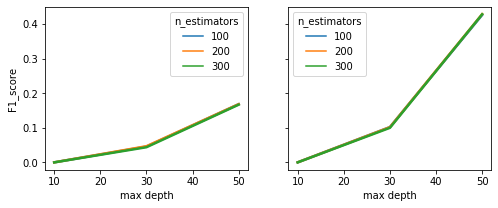

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.lineplot(data=RandomF_cv_results_vis.loc[:,'mean_test_score'], linewidth=2.5, dashes=False, ax=ax1)
ax1.set_xlabel('max depth')
ax1.set_ylabel('F1_score')
ax1.legend(title='n_estimators')
sns.lineplot(data=RandomF_cv_results_vis.loc[:,'mean_train_score'], linewidth=2.5, dashes=False, ax=ax2)
ax2.set_xlabel('max depth')
ax2.set_ylabel('')
ax2.legend(title='n_estimators')

Le nombre d'estimateurs ne semble pas avoir d'impact, il aurait peut être fallu tester des arbres encore plus court. Augmenter la profondeur de l'arbre fait monter le F1 score, mais le modèle dans tous les cas est en surapprentissage fort.

## Comparaison des performances et choix du modèle :

In [73]:
results = pd.DataFrame()
results = results.append(Ridge_cv_results.loc[Ridge_cv_model.best_index_,['mean_test_score','mean_train_score']])
results = results.append(Logistic_cv_results.loc[Logistic_cv_model.best_index_,['mean_test_score','mean_train_score']])
results = results.append(SGDC_cv_results.loc[SGDC_cv_model.best_index_,['mean_test_score','mean_train_score']])
results = results.append(MultiNB_cv_results.loc[MultiNB_cv_model.best_index_,['mean_test_score','mean_train_score']])
results = results.append(RandomF_cv_results.loc[RandomF_cv_model.best_index_,['mean_test_score','mean_train_score']])
results['model'] = ['Ridge', 'Logistic', 'SGDC', 'MultiNB', 'RandomF']

Text(0.5, 1.0, 'mean_train_score')

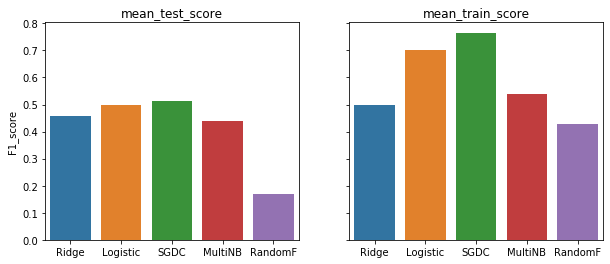

In [75]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)
sns.barplot(x='model', y='mean_test_score', data=results, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('F1_score')
ax1.set_title('mean_test_score')
ax1.yaxis.set_major_locator(mplb.ticker.MultipleLocator(base=0.1))
sns.barplot(x='model', y='mean_train_score', data=results, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('mean_train_score')

Au final on retiendra le modèle SGDC avec pertes 'hinge', même si les autres modèles ne sont pas si loin derrière.

## Sauvegarde du modèle

In [62]:
#dump(SGDC_cv_model.best_estimator_, 'SGDC_supervised_Model.joblib')

# Test du modèle retenu sur le set d'évaluation :

On évalue ensuite la performance du modèle sur des données qu'il n'a pas encore vu, le test set.

## Performance sur le test set :

In [63]:
print('Ridge F1 score :')
f1_score(SGDC_cv_model.predict(X_test), y_test, average='macro')

Ridge F1 score :


0.5145456388798376

Le F1 score obtenu est de 0.51, très similaire aux performances obtenues lors de l'entrainement avec GridSearch. Ce niveau de perfromance devrait donc pouvoir se généraliser à d'autres sets de données évalué sur les 100 même tags.

In [64]:
prediction = SGDC_cv_model.predict(X_test)
test_precision_recall = precision_recall_fscore_support(prediction, y_test, average=None)
test_results = pd.DataFrame()
test_results['tag'] = tags[:100]['tags'].values
test_results['F1_score'] = test_precision_recall[2]
test_results['precision'] = test_precision_recall[0]
test_results['recall'] = test_precision_recall[1]
test_results['tag_rank'] = tags[:100]['rank'].values
test_results.sort_values(by='F1_score', inplace=True, ascending=False)

Pour pousser un peu plus loin l'analyse du résultats on peut regarder en détails le F1 score obtenu, la précision et le rappel pour chacun des tags. Ci dessous les 20 tags ayant obtenus les meilleures performances :

In [76]:
display(test_results.round(decimals=2).head(20))

,tag,F1_score,precision,recall,tag_rank
98,ggplot2,0.89,0.85,0.94,98
24,django,0.87,0.84,0.91,24
54,git,0.87,0.86,0.89,54
86,swiftui,0.87,0.76,1.00,86
85,elasticsearch,0.86,0.78,0.96,85
60,wordpress,0.83,0.80,0.86,60
66,unity3d,0.83,0.80,0.86,66
75,keras,0.82,0.77,0.88,75
34,docker,0.82,0.84,0.81,34
48,mongodb,0.82,0.76,0.89,48


Et les 20 tags ayant obtenus les perdormances les plus faibles :

In [77]:
display(test_results.round(decimals=2).tail(20))

,tag,F1_score,precision,recall,tag_rank
93,visual-studio,0.24,0.19,0.36,93
53,linux,0.22,0.15,0.40,53
81,algorithm,0.20,0.14,0.42,81
70,android-studio,0.20,0.16,0.28,70
69,.net-core,0.18,0.12,0.38,69
16,arrays,0.18,0.14,0.25,16
30,dataframe,0.17,0.10,0.39,30
76,windows,0.16,0.12,0.26,76
59,loops,0.08,0.04,0.50,59
95,date,0.05,0.03,0.25,95


Au final il est intéressant de noter les points suivants :
- Les tags plus précis, comme les noms de logiciel et frame work particuliers ont souvent un bon score
- Les tags plus 'généraux' comme des termes techniques partagé par plusieurs technologies / languages (function, dataframe, windows, api, database ...) eux ont des scores moins bons.
- Certains tags ne sont jamais prédits (F1 score de 0)
- Les tags initialement les plus représentés ne sont pas forcément les mieux prédits comme ont peu le voir avec la colonne 'rank'. On retrouve dans le top 20 prédits aussi bien des tags fortement représentés comme 'r' qui est classé 10ème et ceux qui le sont moins comme 'ggplot2', qui est pourtant top score.

## Exemple d'utilisation :

In [67]:
print('Tire de la question : \n')
print(data.title[8])

Tire de la question : 

Stop SwipeRefreshLayout refresh animation, despite setRefresh(false)/isRefreshing=false


In [68]:
preds = SGDC_cv_model.predict(questions[[8]])

In [69]:
print('Tags utilisés : \n')
print(data.tags[8])

Tags utilisés : 

['java', 'android', 'android-layout', 'kotlin', 'swiperefreshlayout']


In [70]:
print('Tags suggérés : \n')
print(tags_vocab['supervised'].reset_index(drop=True)[preds.nonzero()[1]])

Tags suggérés : 

2        java
5     android
39     kotlin
Name: supervised, dtype: object


In [71]:
print('Corps de la question : \n')
print(data.body[8])

Corps de la question : 

<p>Im using <code>SwipeRefreshLayout</code> to refresh my activity. Layout looks like this, very simple:</p>

<pre><code>&lt;androidx.swiperefreshlayout.widget.SwipeRefreshLayout
        xmlns:android="http://schemas.android.com/apk/res/android"
        xmlns:tools="http://schemas.android.com/tools"
        android:id="@+id/swipeRefreshLayout"
        android:layout_width="match_parent"
        android:layout_height="match_parent"&gt;
    &lt;androidx.core.widget.NestedScrollView
            android:id="@+id/feedBase"
            android:layout_width="match_parent"
            android:layout_height="match_parent"&gt;
        &lt;LinearLayout
                android:id="@+id/linearLayoutFeed"
                android:layout_width="match_parent"
                android:layout_height="wrap_content"
                android:orientation="vertical"/&gt;
    &lt;/androidx.core.widget.NestedScrollView&gt;
&lt;/androidx.swiperefreshlayout.widget.SwipeRefreshLayout&gt;
</c